# Formula Slug Autonomous Onboarding Homework
### Author : Nathan Yee

This is a simple neural network that uses the TorchVision KMNIST dataset to identify Japanese Hiragana characters.

In [25]:
# Import necessary libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [26]:
# Ensure we're running on the Apple Silicon mps gpu
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [27]:
# Import the KMNIST dataset and use transform

training_data = datasets.KMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.KMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [28]:
# Use the DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


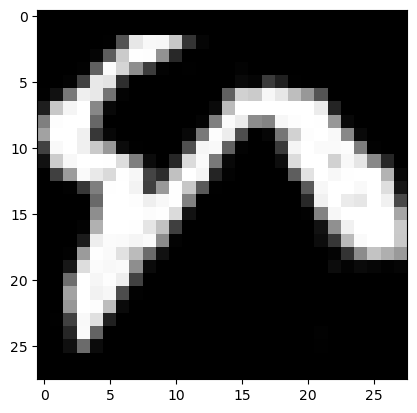

Label: 5


In [29]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [30]:
# Define the Neural Network Class
class KMNISTNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [31]:
# Instantiate the model and move to device
model = KMNISTNeuralNetwork().to(device)
print(model)

KMNISTNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [32]:
# Check Device
next(model.parameters()).device

device(type='mps', index=0)

In [33]:
# Initialize Hyperparameters
learning_rate = .001
batch_size = 64
epochs = 10

# Initialize loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate)

In [34]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode 
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [36]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.222764  [   64/60000]
loss: 1.065933  [ 6464/60000]
loss: 0.865385  [12864/60000]
loss: 1.166366  [19264/60000]
loss: 1.130759  [25664/60000]
loss: 0.932594  [32064/60000]
loss: 1.043487  [38464/60000]
loss: 1.017629  [44864/60000]
loss: 1.005402  [51264/60000]
loss: 0.907456  [57664/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.379986 

Epoch 2
-------------------------------
loss: 0.849160  [   64/60000]
loss: 0.884589  [ 6464/60000]
loss: 0.677524  [12864/60000]
loss: 0.729306  [19264/60000]
loss: 1.080863  [25664/60000]
loss: 0.923737  [32064/60000]
loss: 1.012279  [38464/60000]
loss: 0.787216  [44864/60000]
loss: 0.806008  [51264/60000]
loss: 0.952191  [57664/60000]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.323891 

Epoch 3
-------------------------------
loss: 0.767137  [   64/60000]
loss: 0.928735  [ 6464/60000]
loss: 0.807014  [12864/60000]
loss: 0.716737  [19264/60000]
loss: 0.981683  [25664/60000]
loss: 1.162930  [32064/600